In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
if not os.path.exists('../data/CreditScoring.csv'):
    !wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/CreditScoring.csv')

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [8]:
df.status = df.status.map({1: 'ok', 2: 'default', 0: 'unknown'})
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
df.status

0            ok
1            ok
2       default
3            ok
4            ok
         ...   
4450    default
4451         ok
4452    default
4453         ok
4454         ok
Name: status, Length: 4455, dtype: object

In [10]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [11]:
df.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [13]:
df.income.replace(99999999, np.nan, inplace=True)
df.head()


/tmp/ipykernel_1512776/1632093569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.income.replace(99999999, np.nan, inplace=True)


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0,0,310,910


In [14]:
df.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [15]:
df = df[df.status != 'unknown'].reset_index(drop=True)
df.status.value_counts()


status
ok         3200
default    1254
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,1,parents,24,19,single,no,fixed,35,28.0,0,0,400,600
1,ok,14,private,12,49,married,no,fixed,90,140.0,3000,500,400,1432
2,default,5,other,48,22,single,no,fixed,35,82.0,0,0,480,1910
3,ok,2,parents,48,20,single,no,fixed,35,318.0,99999999,0,740,1325
4,ok,0,private,36,60,married,no,fixed,60,140.0,3000,0,1000,2050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,default,8,owner,36,48,married,yes,fixed,35,121.0,3000,0,400,925
887,ok,0,parents,36,22,single,no,partime,35,81.0,2500,0,400,775
888,ok,10,owner,36,50,married,no,freelance,75,0.0,7500,0,1000,1230
889,default,11,parents,60,30,married,yes,fixed,45,105.0,5000,0,1500,2500


In [18]:
df_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,default,12,private,24,28,married,no,fixed,45,102.0,99999999,99999999,700,1229
1,ok,4,other,60,28,married,no,fixed,60,143.0,0,0,1150,1630
2,ok,0,owner,60,27,married,no,fixed,35,295.0,6000,0,1950,2208
3,ok,6,owner,48,28,married,no,fixed,45,114.0,3500,0,650,1255
4,ok,12,owner,36,42,married,no,freelance,60,0.0,15000,0,1000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,default,0,rent,48,54,married,no,freelance,135,0.0,0,0,2000,2476
2668,ok,6,rent,12,33,married,no,fixed,85,250.0,0,0,500,1500
2669,default,9,parents,60,32,single,yes,fixed,35,105.0,0,0,1490,1490
2670,ok,0,parents,60,21,single,no,others,35,149.0,3000,0,1400,1829


In [19]:
df_val

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,15,owner,48,37,married,yes,freelance,45,178.0,30000,9500,2400,3120
1,ok,2,owner,48,57,married,no,fixed,45,184.0,4000,0,1000,1500
2,default,1,parents,60,23,single,no,fixed,35,90.0,0,0,1100,1107
3,ok,7,owner,36,29,married,no,fixed,60,121.0,3000,0,650,915
4,ok,9,owner,60,47,married,no,freelance,75,178.0,50000,0,1850,1852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,default,0,owner,60,23,married,no,fixed,45,120.0,4000,1000,1200,1476
887,default,0,parents,36,35,married,no,freelance,75,0.0,0,0,1450,1500
888,default,0,parents,36,22,married,no,partime,60,137.0,0,0,700,900
889,default,8,other,60,41,married,no,freelance,45,62.0,0,0,1800,2101


In [20]:
df_val

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,15,owner,48,37,married,yes,freelance,45,178.0,30000,9500,2400,3120
1,ok,2,owner,48,57,married,no,fixed,45,184.0,4000,0,1000,1500
2,default,1,parents,60,23,single,no,fixed,35,90.0,0,0,1100,1107
3,ok,7,owner,36,29,married,no,fixed,60,121.0,3000,0,650,915
4,ok,9,owner,60,47,married,no,freelance,75,178.0,50000,0,1850,1852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,default,0,owner,60,23,married,no,fixed,45,120.0,4000,1000,1200,1476
887,default,0,parents,36,35,married,no,freelance,75,0.0,0,0,1450,1500
888,default,0,parents,36,22,married,no,partime,60,137.0,0,0,700,900
889,default,8,other,60,41,married,no,freelance,45,62.0,0,0,1800,2101


In [21]:
y_train = (df_train.status == 'default').astype(int)
y_val = (df_val.status == 'default').astype(int)
y_test = (df_test.status == 'default').astype(int)


In [22]:
df_train = df_train.drop(columns=['status'])
df_val = df_val.drop(columns=['status'])
df_test = df_test.drop(columns=['status'])

In [23]:
df_train.iloc[0].to_dict()


{'seniority': 12,
 'home': 'private',
 'time': 24,
 'age': 28,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 45,
 'income': 102.0,
 'assets': 99999999,
 'debt': 99999999,
 'amount': 700,
 'price': 1229}

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

dv = DictVectorizer(sparse=False)


In [25]:
train_dicts = df_train.to_dict(orient='records')
dv.fit(train_dicts)

X_train = dv.transform(train_dicts)
X_train.shape

(2672, 29)

In [26]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]
y_pred


array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0.

In [29]:
roc_auc_score(y_val, y_pred)

np.float64(0.6634713556437889)

In [30]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

In [31]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- income <= 89.50
|   |--- seniority <= 2.50
|   |   |--- records=no <= 0.50
|   |   |   |--- age <= 53.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  53.50
|   |   |   |   |--- class: 0
|   |   |--- records=no >  0.50
|   |   |   |--- time <= 27.00
|   |   |   |   |--- class: 0
|   |   |   |--- time >  27.00
|   |   |   |   |--- class: 1
|   |--- seniority >  2.50
|   |   |--- records=yes <= 0.50
|   |   |   |--- expenses <= 81.50
|   |   |   |   |--- class: 0
|   |   |   |--- expenses >  81.50
|   |   |   |   |--- class: 1
|   |   |--- records=yes >  0.50
|   |   |   |--- assets <= 3450.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  3450.00
|   |   |   |   |--- class: 0
|--- income >  89.50
|   |--- records=yes <= 0.50
|   |   |--- job=partime <= 0.50
|   |   |   |--- seniority <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- seniority >  4.50
|   |   |   |   |--- class: 0
|   |   |--- job=partime >  0.50
|   |   |   |--- assets <= 7250.00
|   |   |   

In [32]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)


np.float64(0.770224365034348)

In [33]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

In [34]:
df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [35]:
df_example.sort_values('assets')


,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [36]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]


In [37]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [38]:
from IPython.display import display


In [39]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [40]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [41]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [42]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [43]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


In [44]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.616


   2 -> 0.711
   3 -> 0.752
   4 -> 0.770
   5 -> 0.768
   6 -> 0.740
  10 -> 0.672
  15 -> 0.652
  20 -> 0.651
None -> 0.652


In [79]:
scores = []

for depth in [4, 5, 6, 7, 8, 9, 10, 15, 20, None]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [80]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [81]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth           NaN   4.0    5.0    6.0    7.0    8.0    9.0    10.0   
min_samples_leaf                                                           
1                 0.652  0.770  0.768  0.755  0.741  0.719  0.693  0.670   
5                 0.714  0.774  0.778  0.769  0.767  0.751  0.735  0.733   
10                0.746  0.775  0.774  0.769  0.775  0.765  0.751  0.745   
15                0.755  0.774  0.775  0.782  0.775  0.766  0.755  0.744   
20                0.768  0.774  0.779  0.786  0.786  0.774  0.767  0.767   
100               0.783  0.775  0.769  0.779  0.784  0.783  0.783  0.783   
200               0.761  0.758  0.760  0.761  0.761  0.761  0.761  0.761   
500               0.687  0.687  0.687  0.687  0.687  0.687  0.687  0.687   

                                
max_depth          15.0   20.0  
min_samples_leaf                
1                 0.661  0.645  
5                 0.720  0.716  
10                0.745  0.745  
15                0.755  0.757  
20                0.767  0.767  
100               0.783  0.783  
200               0.761  0.761  
500               0.687  0.687

In [82]:
import seaborn as sns

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

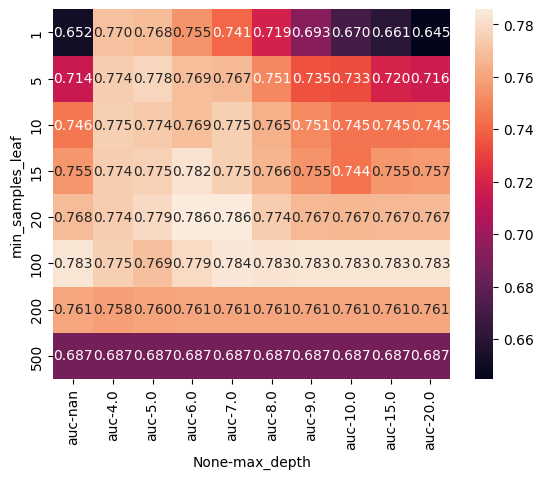

In [83]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


In [50]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [51]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- income <= 89.50
|   |--- seniority <= 2.50
|   |   |--- records=no <= 0.50
|   |   |   |--- amount <= 950.00
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  950.00
|   |   |   |   |--- income <= 61.00
|   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  38.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  61.00
|   |   |   |   |   |--- class: 1
|   |   |--- records=no >  0.50
|   |   |   |--- time <= 27.00
|   |   |   |   |--- marital=married <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- marital=married >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- time >  27.00
|   |   |   |   |--- income <= 32.50
|   |   |   |   |   |--- assets <= 3750.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3750.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  32.50
|   |   |   |   |   |--- job=partime <= 0.50
|   |   |   |   |   |   |--- 

In [52]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [53]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [54]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

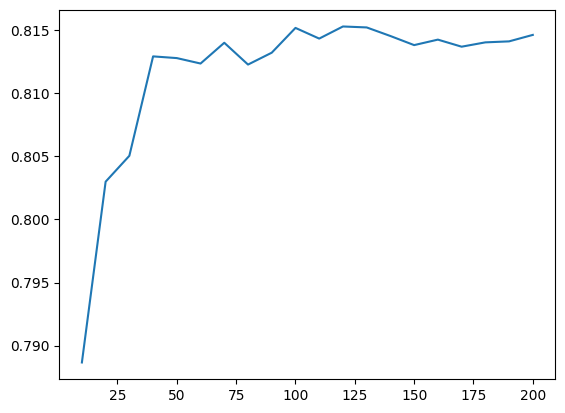

In [55]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [56]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [57]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

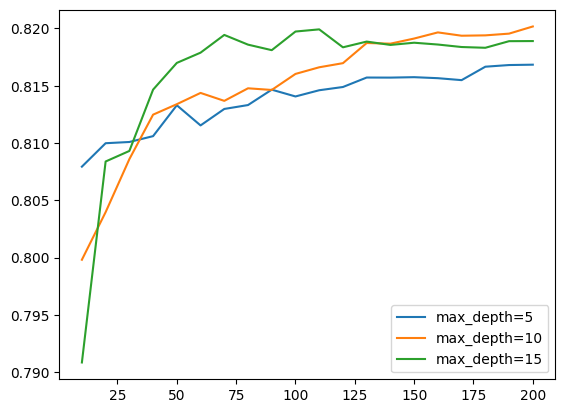

In [58]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [59]:
max_depth = 10

In [84]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [85]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

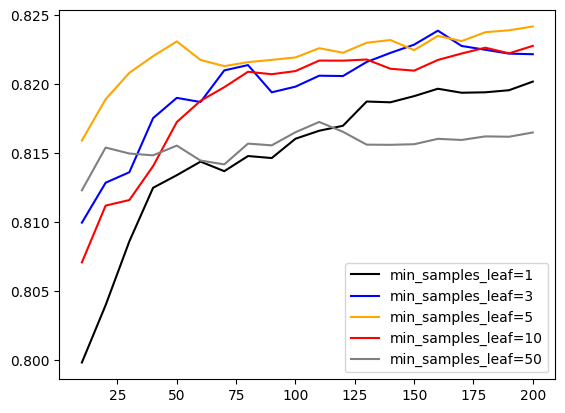

In [86]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [87]:
min_samples_leaf = 3

In [88]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [89]:
import xgboost as xgb


In [101]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [105]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [106]:
y_pred = model.predict(dval)

In [107]:
roc_auc_score(y_val, y_pred)

np.float64(0.816436629482574)

In [110]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [142]:
%%capture output

xgb_params = {
    'gamma' : 0.3,
    'eta': 0.05, 
    'max_depth': 3,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [143]:
s = output.stdout

In [144]:
print(s[:200])

[0]	train-auc:0.77697	val-auc:0.75199
[5]	train-auc:0.81767	val-auc:0.78278
[10]	train-auc:0.82422	val-auc:0.79380
[15]	train-auc:0.83929	val-auc:0.79963
[20]	train-auc:0.84648	val-auc:0.80305
[25]	tr


In [145]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [146]:
df_score = parse_xgb_output(output)

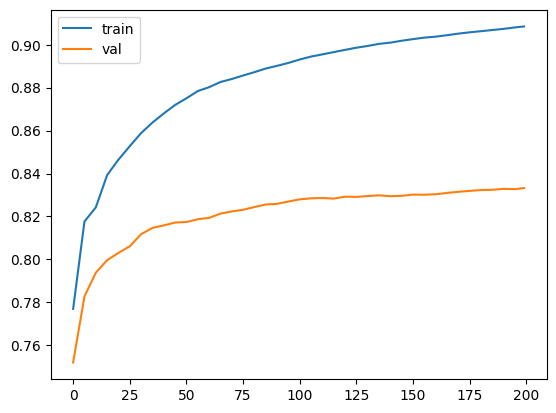

In [147]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

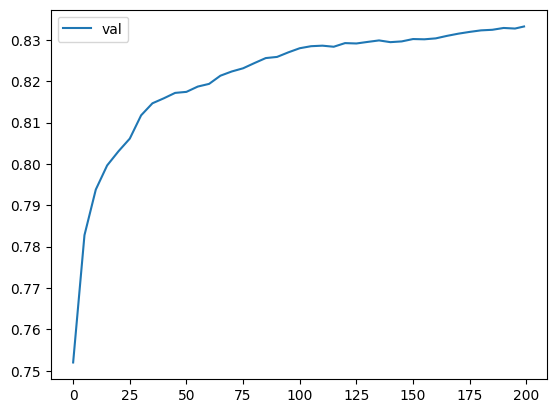

In [148]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [149]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.78109	val-auc:0.76513
[5]	train-auc:0.82129	val-auc:0.78708
[10]	train-auc:0.84214	val-auc:0.80143
[15]	train-auc:0.85457	val-auc:0.81046
[20]	train-auc:0.86221	val-auc:0.81414
[25]	train-auc:0.86683	val-auc:0.81981
[30]	train-auc:0.87085	val-auc:0.82162
[35]	train-auc:0.87404	val-auc:0.82327
[40]	train-auc:0.87656	val-auc:0.82585
[45]	train-auc:0.87991	val-auc:0.82830
[50]	train-auc:0.88152	val-auc:0.83019
[55]	train-auc:0.88376	val-auc:0.83160
[60]	train-auc:0.88502	val-auc:0.83282
[65]	train-auc:0.88624	val-auc:0.83244
[70]	train-auc:0.88694	val-auc:0.83357
[75]	train-auc:0.88782	val-auc:0.83391
[80]	train-auc:0.88839	val-auc:0.83331
[85]	train-auc:0.88924	val-auc:0.83391
[90]	train-auc:0.89005	val-auc:0.83529
[95]	train-auc:0.89109	val-auc:0.83526
[100]	train-auc:0.89189	val-auc:0.83507
[105]	train-auc:0.89241	val-auc:0.83548
[110]	train-auc:0.89314	val-auc:0.83589
[115]	train-auc:0.89402	val-auc:0.83625
[120]	train-auc:0.89476	val-auc:0.83633
[125]	train-auc:0.8954

In [150]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [151]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7822209617445011)

In [152]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [153]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8221591983361694)

In [154]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [155]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8314741286947752)

In [156]:
df_full_train = df_full_train.reset_index(drop=True)

In [157]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [158]:
del df_full_train['status']

In [159]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [161]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [162]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [163]:
y_pred = model.predict(dtest)

In [164]:
roc_auc_score(y_test, y_pred)

np.float64(0.8249618560945485)